In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [32]:
import matplotlib.pyplot as plt
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    #plt.legend(['Train'], loc='upper right')

In [33]:
data = pd.read_csv('../assignment 3/data/q2_dataset.csv')

In [34]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91


In [35]:
data.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21
1258,07/09/15,$120.07,78291510,123.85,124.06,119.22


In [36]:
type(data)

pandas.core.frame.DataFrame

In [37]:
list(data.columns)

['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']

In [38]:
data.columns = data.columns.str.strip()
list(data.columns)

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [39]:
data['target']= data['Open']
data['Date'] =pd.to_datetime(data.Date)
data=data.sort_values(by='Date')
data.head()

,Date,Close/Last,Volume,Open,High,Low,target
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72


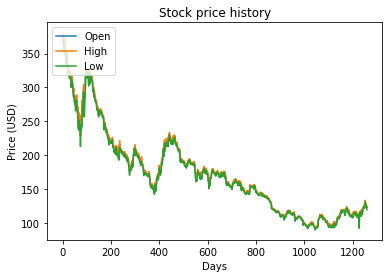

In [40]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
#plt.plot(data["Close"])
plt.title('Stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low'], loc='upper left')
plt.show()

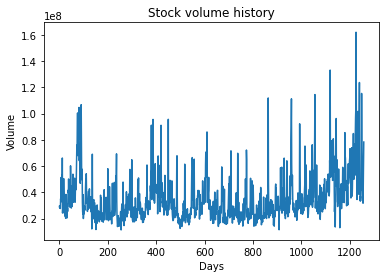

In [41]:
plt.figure()
plt.plot(data["Volume"])
plt.title('Stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [42]:
#create features using columns from previous 3 days
data['Volume_t-3'] = data.shift(3)['Volume']
data['Volume_t-2'] = data.shift(2)['Volume']
data['Volume_t-1'] = data.shift(1)['Volume']
data['Open_t-3'] = data.shift(3)['Open']
data['Open_t-2'] = data.shift(2)['Open']
data['Open_t-1'] = data.shift(1)['Open']
data['High_t-3'] = data.shift(3)['High']
data['High_t-2'] = data.shift(2)['High']
data['High_t-1'] = data.shift(1)['High']
data['Low_t-3'] = data.shift(3)['Low']
data['Low_t-2'] = data.shift(2)['Low']
data['Low_t-1'] = data.shift(1)['Low']
data['target']= data['Open']
data.head()

,Date,Close/Last,Volume,Open,High,Low,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [43]:
data = data.drop(['Close/Last','Volume','Open','High','Low'], axis = 1)
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [44]:
data.isna().sum()

Date          0
target        0
Volume_t-3    3
Volume_t-2    2
Volume_t-1    1
Open_t-3      3
Open_t-2      2
Open_t-1      1
High_t-3      3
High_t-2      2
High_t-1      1
Low_t-3       3
Low_t-2       2
Low_t-1       1
dtype: int64

In [45]:
#drop columns with null values
data = data.dropna()
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04
1253,2015-07-16,127.74,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58
1252,2015-07-17,129.08,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35
1251,2015-07-20,130.97,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31


In [46]:
list(data.columns)

['Date',
 'target',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1']

In [47]:
data = data[[
 'Date',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1', 
 'target']]
data.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
1255,2015-07-14,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32,126.04
1254,2015-07-15,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,125.72
1253,2015-07-16,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,127.74
1252,2015-07-17,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,129.08
1251,2015-07-20,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,130.97


## Dataset Creation

We sorted the dataset in ascending order, since our intention is to predict the opening price from the **previous** three days. Using the pandas shift function which shifts the index by desired number of periods, we were able to create new features by specifying the index that was needed. For example, to get the Volume from three days prior, we shift by 3 - data.shift(3)['Volume']. This process was repeated for all necessary columns and indices. 


In [48]:
len(data)

1256

In [49]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
train, test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('train_data_RNN.csv',index=False)
test.to_csv('test_data_RNN.csv',index=False)


In [50]:
type(train)

pandas.core.frame.DataFrame

In [51]:
train.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
566,2018-04-09,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20,169.88
121,2020-01-14,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15,316.70
354,2019-02-11,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42,171.05
676,2017-10-27,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78,159.29
888,2016-12-23,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64,115.59


In [52]:
data_train = pd.read_csv('train_data_RNN.csv')
data_test = pd.read_csv('test_data_RNN.csv')

## Preprocessing

**Scaling the data**

The range of the data is widely varied. The values of Volume are very high and could skew the model. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. We utilise the Minmax scaler to keep feature values between 0 and 1. 

Scaled values of X are created using the following formula:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

We also tried the Standard scaler, however there was no significant difference in training or test loss with this scaler. 

**Splitting Features and Target**

The target is the opening price of the day we wish to predict. 

In [53]:
#separate features and target
X_train = data_train.drop(['Date','target'], axis = 1)
y_train = data_train['target']
X_test_date = data_test
X_test = data_test.drop(['Date','target'], axis = 1)
y_test = data_test['target']


In [54]:
X_train


,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20
1,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15
2,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42
3,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78
4,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64
...,...,...,...,...,...,...,...,...,...,...,...,...
874,20182050.0,20670830.0,15955820.0,189.69,191.78,190.68,192.55,192.43,191.96,189.69,190.17,189.56
875,36487930.0,38016810.0,52954070.0,211.15,216.88,219.05,215.18,220.45,222.36,209.27,216.62,216.81
876,28803760.0,33511990.0,36486560.0,303.22,305.64,308.10,305.17,310.35,317.05,301.97,304.29,307.24
877,35907770.0,25402270.0,21983410.0,151.78,153.80,153.89,153.92,154.72,154.28,151.69,153.54,152.70


In [55]:
X_test

,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70
1,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62
2,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37
3,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77
4,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12
...,...,...,...,...,...,...,...,...,...,...,...,...
372,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80
373,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74
374,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33
375,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43


In [56]:
y_train

0      169.88
1      316.70
2      171.05
3      159.29
4      115.59
        ...  
874    192.45
875    209.55
876    317.83
877    153.21
878    167.88
Name: target, Length: 879, dtype: float64

In [57]:
y_test

0      132.85
1      144.49
2      116.44
3      191.81
4      108.91
        ...  
372    112.02
373    205.53
374    148.82
375    273.61
376    284.82
Name: target, Length: 377, dtype: float64

In [58]:
X_test_date

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
0,2015-07-21,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,132.85
1,2017-06-28,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62,144.49
2,2015-09-25,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37,116.44
3,2019-06-10,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77,191.81
4,2016-04-08,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12,108.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2015-12-17,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80,112.02
373,2019-08-02,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74,205.53
374,2017-07-17,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33,148.82
375,2020-04-22,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43,273.61


In [59]:
#scale the data 
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
#saving the scaler to apply it on the test dataset
import pickle
with open('scaler_RNN_model','wb') as file_pick:
    pickle.dump(scaler,file_pick)

In [61]:
#numpy array conversion
X_train=np.array(X_train)
X_test=np.array(X_test)

In [62]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [63]:
X_train.shape[0],X_train.shape[1]
X_train.shape

(879, 12, 1)

In [64]:
X_test.shape[0],X_test.shape[1]


(377, 12)

## Design Steps

RNNs were not chosen because of the vanishing gradient problem. Long short-term memory (LSTM) is a deep learning system that avoids the vanishing gradient problem. LSTM is normally augmented by recurrent gates called “forget gates”.LSTM prevents backpropagated errors from vanishing or exploding. Instead, errors can flow backwards through unlimited numbers of virtual layers unfolded in space. 

Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks introduced in 2014. They are used in the full form and several simplified variants. They have fewer parameters than LSTM, as they lack an output gate.

LSTMs and GRUs take 3D input so data was reshaped.
We considered various RNN architectures but the following gave the best performance for our problem. 

**Step 1: Model Architecture**

MODEL 1(Medium)

LSTM LAYER 1 - 50 units
Dropout 0.2
LSTM LAYER 2 - 50 units
Dropout 0.2
LSTM LAYER 3 - 50 units
Dropout 0.2
Dense Layer - 1 unit

This model uses three LSTM layers. 20 % of the nodes at each layer are unused to avoid overfitting and improve model performance. 


MODEL 2 (Medium)

GRU Layer 75 units
GRU Layer 30 units
GRU Layer 30 units
Dropout 0.2
Dense Layer - 1 layer

This model uses three GRU layers. 20 % of the nodes at the final GRU layer are unused to avoid overfitting and improve model performance. 

**Step 2: Optimizers considered**
Adagrad - Resulted in poor model performance. Model did not train. 
Stochastic Gradient Descents - Resulted in poor model performance. Model did not train.
Adam: Model performed well with this. It is also recommended as the best optimizer for LSTMs as referenced in [1]

**Step 3: Number of Epochs**

| Epochs  | Model 1 Training Loss | Model 2 Training Loss|
| --- | --- | --- |
| 100 |  | 279 |
|  256 |  | 19932 |
|  512  |  | 8776 |
|  1500 |  | 336 |

**Step 4: Runtime**
Model 1 - 2 min 8s for 1500 epochs
Model 2 -     for 1500 epochs


**Loss Metric**
Mean Squared Error. Mean Absolute Error will also be used for comparison
Accuracy is not used as a metric because this is a regression model.

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


## Model #1

In [66]:
model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [67]:
model.compile(loss='mean_squared_error',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 12, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [69]:
%%time
history = model.fit(X_train,y_train,validation_split=0.05,epochs=1500,batch_size=64,verbose=1)


Epoch 1/1500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-07-17 20:02:43.495267: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-17 20:02:43.497204: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


11/14 [======================>.......] - ETA: 0s - loss: 32881.2157WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16c021dc0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 1s 27ms/step - loss: 32941.7777 - val_loss: 33904.9727
Epoch 2/1500
14/14 [==============================] - 0s 

14/14 [==============================] - 0s 7ms/step - loss: 17302.6779 - val_loss: 18147.9492
Epoch 68/1500
14/14 [==============================] - 0s 6ms/step - loss: 18354.2160 - val_loss: 17830.6699
Epoch 69/1500
14/14 [==============================] - 0s 6ms/step - loss: 16098.5700 - val_loss: 17856.6250
Epoch 70/1500
14/14 [==============================] - 0s 6ms/step - loss: 17914.2908 - val_loss: 17949.5859
Epoch 71/1500
14/14 [==============================] - 0s 6ms/step - loss: 17582.1207 - val_loss: 17689.0371
Epoch 72/1500
14/14 [==============================] - 0s 6ms/step - loss: 16566.9839 - val_loss: 17492.0762
Epoch 73/1500
14/14 [==============================] - 0s 6ms/step - loss: 17237.9555 - val_loss: 17322.7246
Epoch 74/1500
14/14 [==============================] - 0s 7ms/step - loss: 17370.3185 - val_loss: 16945.9043
Epoch 75/1500
14/14 [==============================] - 0s 6ms/step - loss: 17036.2048 - val_loss: 17243.8008
Epoch 76/1500
14/14 [============

Epoch 142/1500
14/14 [==============================] - 0s 7ms/step - loss: 9646.7495 - val_loss: 9594.6289
Epoch 143/1500
14/14 [==============================] - 0s 6ms/step - loss: 8953.3107 - val_loss: 9532.1006
Epoch 144/1500
14/14 [==============================] - 0s 6ms/step - loss: 10065.2842 - val_loss: 9336.2900
Epoch 145/1500
14/14 [==============================] - 0s 6ms/step - loss: 10487.8502 - val_loss: 9279.4023
Epoch 146/1500
14/14 [==============================] - 0s 6ms/step - loss: 9976.6508 - val_loss: 9227.2334
Epoch 147/1500
14/14 [==============================] - 0s 6ms/step - loss: 9681.9012 - val_loss: 9087.1211
Epoch 148/1500
14/14 [==============================] - 0s 6ms/step - loss: 9913.0073 - val_loss: 9409.4170
Epoch 149/1500
14/14 [==============================] - 0s 6ms/step - loss: 8749.1400 - val_loss: 9204.5869
Epoch 150/1500
14/14 [==============================] - 0s 6ms/step - loss: 9275.3708 - val_loss: 8806.6562
Epoch 151/1500
14/14 [====

Epoch 218/1500
14/14 [==============================] - 0s 6ms/step - loss: 6451.3274 - val_loss: 5660.9854
Epoch 219/1500
14/14 [==============================] - 0s 6ms/step - loss: 6244.0438 - val_loss: 5078.3867
Epoch 220/1500
14/14 [==============================] - 0s 6ms/step - loss: 5717.9454 - val_loss: 5289.8633
Epoch 221/1500
14/14 [==============================] - 0s 6ms/step - loss: 5789.7502 - val_loss: 5297.2090
Epoch 222/1500
14/14 [==============================] - 0s 6ms/step - loss: 5888.5581 - val_loss: 5246.5073
Epoch 223/1500
14/14 [==============================] - 0s 6ms/step - loss: 5604.4024 - val_loss: 5276.6631
Epoch 224/1500
14/14 [==============================] - 0s 6ms/step - loss: 5624.3344 - val_loss: 5540.0625
Epoch 225/1500
14/14 [==============================] - 0s 6ms/step - loss: 6240.4275 - val_loss: 4938.1548
Epoch 226/1500
14/14 [==============================] - 0s 6ms/step - loss: 5850.6551 - val_loss: 4899.0513
Epoch 227/1500
14/14 [======

14/14 [==============================] - 0s 6ms/step - loss: 4622.2846 - val_loss: 3566.9360
Epoch 294/1500
14/14 [==============================] - 0s 6ms/step - loss: 4609.4957 - val_loss: 3762.7068
Epoch 295/1500
14/14 [==============================] - 0s 6ms/step - loss: 4518.9849 - val_loss: 3640.1826
Epoch 296/1500
14/14 [==============================] - 0s 6ms/step - loss: 4164.2062 - val_loss: 3900.1548
Epoch 297/1500
14/14 [==============================] - 0s 6ms/step - loss: 4561.7052 - val_loss: 3571.1499
Epoch 298/1500
14/14 [==============================] - 0s 6ms/step - loss: 4175.4193 - val_loss: 3644.6064
Epoch 299/1500
14/14 [==============================] - 0s 6ms/step - loss: 4716.9937 - val_loss: 3843.0525
Epoch 300/1500
14/14 [==============================] - 0s 6ms/step - loss: 4221.3492 - val_loss: 3454.4900
Epoch 301/1500
14/14 [==============================] - 0s 6ms/step - loss: 4841.9967 - val_loss: 3369.9385
Epoch 302/1500
14/14 [=====================

Epoch 369/1500
14/14 [==============================] - 0s 6ms/step - loss: 4449.3472 - val_loss: 3175.7095
Epoch 370/1500
14/14 [==============================] - 0s 7ms/step - loss: 4181.1784 - val_loss: 2983.0986
Epoch 371/1500
14/14 [==============================] - 0s 6ms/step - loss: 4426.8788 - val_loss: 2837.6084
Epoch 372/1500
14/14 [==============================] - 0s 7ms/step - loss: 4082.7922 - val_loss: 2943.2539
Epoch 373/1500
14/14 [==============================] - 0s 6ms/step - loss: 4450.0085 - val_loss: 3585.7607
Epoch 374/1500
14/14 [==============================] - 0s 6ms/step - loss: 4068.7929 - val_loss: 3320.1182
Epoch 375/1500
14/14 [==============================] - 0s 6ms/step - loss: 4498.2727 - val_loss: 3432.4702
Epoch 376/1500
14/14 [==============================] - 0s 6ms/step - loss: 3950.4866 - val_loss: 3298.9182
Epoch 377/1500
14/14 [==============================] - 0s 6ms/step - loss: 4175.4504 - val_loss: 3470.7393
Epoch 378/1500
14/14 [======

Epoch 445/1500
14/14 [==============================] - 0s 6ms/step - loss: 4134.4343 - val_loss: 3152.8501
Epoch 446/1500
14/14 [==============================] - 0s 6ms/step - loss: 4410.8355 - val_loss: 3039.0945
Epoch 447/1500
14/14 [==============================] - 0s 6ms/step - loss: 4369.0357 - val_loss: 2896.6470
Epoch 448/1500
14/14 [==============================] - 0s 6ms/step - loss: 4526.3205 - val_loss: 3415.5186
Epoch 449/1500
14/14 [==============================] - 0s 6ms/step - loss: 4149.3862 - val_loss: 3154.9929
Epoch 450/1500
14/14 [==============================] - 0s 6ms/step - loss: 4041.3478 - val_loss: 3326.6545
Epoch 451/1500
14/14 [==============================] - 0s 6ms/step - loss: 3872.8950 - val_loss: 3058.0334
Epoch 452/1500
14/14 [==============================] - 0s 6ms/step - loss: 3914.1025 - val_loss: 3118.5017
Epoch 453/1500
14/14 [==============================] - 0s 6ms/step - loss: 4162.7004 - val_loss: 3472.0198
Epoch 454/1500
14/14 [======

Epoch 521/1500
14/14 [==============================] - 0s 6ms/step - loss: 4252.0749 - val_loss: 3250.7932
Epoch 522/1500
14/14 [==============================] - 0s 6ms/step - loss: 4233.1956 - val_loss: 3247.8914
Epoch 523/1500
14/14 [==============================] - 0s 6ms/step - loss: 3919.6591 - val_loss: 3116.4287
Epoch 524/1500
14/14 [==============================] - 0s 6ms/step - loss: 3996.7294 - val_loss: 3184.1226
Epoch 525/1500
14/14 [==============================] - 0s 6ms/step - loss: 4082.5114 - val_loss: 2942.6494
Epoch 526/1500
14/14 [==============================] - 0s 6ms/step - loss: 3917.3148 - val_loss: 3512.8687
Epoch 527/1500
14/14 [==============================] - 0s 6ms/step - loss: 4184.0911 - val_loss: 3077.9346
Epoch 528/1500
14/14 [==============================] - 0s 6ms/step - loss: 4089.9833 - val_loss: 3208.6680
Epoch 529/1500
14/14 [==============================] - 0s 6ms/step - loss: 4354.8840 - val_loss: 3410.1626
Epoch 530/1500
14/14 [======

Epoch 597/1500
14/14 [==============================] - 0s 6ms/step - loss: 4160.9491 - val_loss: 3215.7869
Epoch 598/1500
14/14 [==============================] - 0s 6ms/step - loss: 4033.0607 - val_loss: 3238.4158
Epoch 599/1500
14/14 [==============================] - 0s 6ms/step - loss: 4264.4190 - val_loss: 3435.5803
Epoch 600/1500
14/14 [==============================] - 0s 6ms/step - loss: 3662.1915 - val_loss: 3042.0898
Epoch 601/1500
14/14 [==============================] - 0s 6ms/step - loss: 4257.7855 - val_loss: 2901.6208
Epoch 602/1500
14/14 [==============================] - 0s 6ms/step - loss: 4182.7136 - val_loss: 3101.0835
Epoch 603/1500
14/14 [==============================] - 0s 6ms/step - loss: 4281.0697 - val_loss: 2920.2681
Epoch 604/1500
14/14 [==============================] - 0s 6ms/step - loss: 4019.4676 - val_loss: 3224.0757
Epoch 605/1500
14/14 [==============================] - 0s 6ms/step - loss: 4395.1398 - val_loss: 3139.3118
Epoch 606/1500
14/14 [======

Epoch 673/1500
14/14 [==============================] - 0s 7ms/step - loss: 4010.8402 - val_loss: 3098.4377
Epoch 674/1500
14/14 [==============================] - 0s 7ms/step - loss: 4163.9821 - val_loss: 3483.2385
Epoch 675/1500
14/14 [==============================] - 0s 7ms/step - loss: 4198.9530 - val_loss: 3280.8530
Epoch 676/1500
14/14 [==============================] - 0s 6ms/step - loss: 4126.4784 - val_loss: 2970.7783
Epoch 677/1500
14/14 [==============================] - 0s 7ms/step - loss: 3770.0322 - val_loss: 3092.8987
Epoch 678/1500
14/14 [==============================] - 0s 7ms/step - loss: 3903.6113 - val_loss: 3050.9138
Epoch 679/1500
14/14 [==============================] - 0s 7ms/step - loss: 4148.7803 - val_loss: 3045.2893
Epoch 680/1500
14/14 [==============================] - 0s 7ms/step - loss: 4205.7091 - val_loss: 3420.5381
Epoch 681/1500
14/14 [==============================] - 0s 7ms/step - loss: 4349.2675 - val_loss: 3018.5657
Epoch 682/1500
14/14 [======

Epoch 749/1500
14/14 [==============================] - 0s 6ms/step - loss: 4035.7117 - val_loss: 2949.1531
Epoch 750/1500
14/14 [==============================] - 0s 6ms/step - loss: 4180.1795 - val_loss: 2853.4182
Epoch 751/1500
14/14 [==============================] - 0s 6ms/step - loss: 4121.9951 - val_loss: 3297.7546
Epoch 752/1500
14/14 [==============================] - 0s 6ms/step - loss: 4187.0183 - val_loss: 3129.2053
Epoch 753/1500
14/14 [==============================] - 0s 6ms/step - loss: 3986.0894 - val_loss: 3165.5876
Epoch 754/1500
14/14 [==============================] - 0s 6ms/step - loss: 4190.9355 - val_loss: 3093.8398
Epoch 755/1500
14/14 [==============================] - 0s 6ms/step - loss: 4231.7523 - val_loss: 3328.8232
Epoch 756/1500
14/14 [==============================] - 0s 6ms/step - loss: 4262.8825 - val_loss: 2850.9958
Epoch 757/1500
14/14 [==============================] - 0s 6ms/step - loss: 3970.4665 - val_loss: 3314.5898
Epoch 758/1500
14/14 [======

Epoch 825/1500
14/14 [==============================] - 0s 6ms/step - loss: 1408.5133 - val_loss: 5334.5684
Epoch 826/1500
14/14 [==============================] - 0s 6ms/step - loss: 1408.9578 - val_loss: 5175.9517
Epoch 827/1500
14/14 [==============================] - 0s 6ms/step - loss: 1375.6167 - val_loss: 3130.3328
Epoch 828/1500
14/14 [==============================] - 0s 6ms/step - loss: 1266.0855 - val_loss: 5019.2285
Epoch 829/1500
14/14 [==============================] - 0s 6ms/step - loss: 1188.9810 - val_loss: 4968.5186
Epoch 830/1500
14/14 [==============================] - 0s 6ms/step - loss: 1175.6978 - val_loss: 3067.7944
Epoch 831/1500
14/14 [==============================] - 0s 6ms/step - loss: 1328.5684 - val_loss: 5666.8081
Epoch 832/1500
14/14 [==============================] - 0s 6ms/step - loss: 1251.8991 - val_loss: 3795.5908
Epoch 833/1500
14/14 [==============================] - 0s 6ms/step - loss: 1281.6962 - val_loss: 5318.5776
Epoch 834/1500
14/14 [======

14/14 [==============================] - 0s 6ms/step - loss: 786.6534 - val_loss: 5320.3770
Epoch 902/1500
14/14 [==============================] - 0s 6ms/step - loss: 633.1210 - val_loss: 5353.9688
Epoch 903/1500
14/14 [==============================] - 0s 6ms/step - loss: 851.4492 - val_loss: 4766.7295
Epoch 904/1500
14/14 [==============================] - 0s 6ms/step - loss: 719.0860 - val_loss: 8044.8188
Epoch 905/1500
14/14 [==============================] - 0s 6ms/step - loss: 758.6463 - val_loss: 4671.5210
Epoch 906/1500
14/14 [==============================] - 0s 6ms/step - loss: 706.9271 - val_loss: 5969.4644
Epoch 907/1500
14/14 [==============================] - 0s 6ms/step - loss: 755.7133 - val_loss: 5741.1895
Epoch 908/1500
14/14 [==============================] - 0s 7ms/step - loss: 776.9933 - val_loss: 7372.5347
Epoch 909/1500
14/14 [==============================] - 0s 6ms/step - loss: 799.8064 - val_loss: 5415.8770
Epoch 910/1500
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 582.6151 - val_loss: 5736.0410
Epoch 978/1500
14/14 [==============================] - 0s 6ms/step - loss: 476.7032 - val_loss: 5804.6089
Epoch 979/1500
14/14 [==============================] - 0s 6ms/step - loss: 501.1825 - val_loss: 5277.9521
Epoch 980/1500
14/14 [==============================] - 0s 6ms/step - loss: 490.4385 - val_loss: 5545.9028
Epoch 981/1500
14/14 [==============================] - 0s 6ms/step - loss: 598.9133 - val_loss: 6999.1074
Epoch 982/1500
14/14 [==============================] - 0s 6ms/step - loss: 540.0218 - val_loss: 6393.8955
Epoch 983/1500
14/14 [==============================] - 0s 6ms/step - loss: 516.4937 - val_loss: 6623.1875
Epoch 984/1500
14/14 [==============================] - 0s 6ms/step - loss: 624.9477 - val_loss: 5964.0342
Epoch 985/1500
14/14 [==============================] - 0s 6ms/step - loss: 590.4429 - val_loss: 6727.5044
Epoch 986/1500
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 408.4347 - val_loss: 6165.0894
Epoch 1054/1500
14/14 [==============================] - 0s 6ms/step - loss: 418.5721 - val_loss: 7923.5283
Epoch 1055/1500
14/14 [==============================] - 0s 6ms/step - loss: 443.8214 - val_loss: 4697.2480
Epoch 1056/1500
14/14 [==============================] - 0s 6ms/step - loss: 380.2567 - val_loss: 5067.0132
Epoch 1057/1500
14/14 [==============================] - 0s 6ms/step - loss: 503.8902 - val_loss: 5650.6484
Epoch 1058/1500
14/14 [==============================] - 0s 6ms/step - loss: 367.8140 - val_loss: 6955.8076
Epoch 1059/1500
14/14 [==============================] - 0s 6ms/step - loss: 359.1905 - val_loss: 5259.1699
Epoch 1060/1500
14/14 [==============================] - 0s 6ms/step - loss: 404.6270 - val_loss: 4779.5513
Epoch 1061/1500
14/14 [==============================] - 0s 6ms/step - loss: 417.2067 - val_loss: 4632.5474
Epoch 1062/1500
14/14 [=====================

14/14 [==============================] - 0s 6ms/step - loss: 340.8360 - val_loss: 4930.5464
Epoch 1130/1500
14/14 [==============================] - 0s 6ms/step - loss: 371.8546 - val_loss: 5369.9238
Epoch 1131/1500
14/14 [==============================] - 0s 6ms/step - loss: 335.9176 - val_loss: 8757.2568
Epoch 1132/1500
14/14 [==============================] - 0s 6ms/step - loss: 355.6772 - val_loss: 6662.2456
Epoch 1133/1500
14/14 [==============================] - 0s 6ms/step - loss: 397.8280 - val_loss: 5651.9424
Epoch 1134/1500
14/14 [==============================] - 0s 6ms/step - loss: 360.4238 - val_loss: 5447.6309
Epoch 1135/1500
14/14 [==============================] - 0s 6ms/step - loss: 322.3549 - val_loss: 5794.7456
Epoch 1136/1500
14/14 [==============================] - 0s 6ms/step - loss: 400.9045 - val_loss: 6259.4199
Epoch 1137/1500
14/14 [==============================] - 0s 6ms/step - loss: 375.0218 - val_loss: 5974.1177
Epoch 1138/1500
14/14 [=====================

14/14 [==============================] - 0s 6ms/step - loss: 331.9423 - val_loss: 5908.0044
Epoch 1206/1500
14/14 [==============================] - 0s 6ms/step - loss: 360.3353 - val_loss: 4509.9414
Epoch 1207/1500
14/14 [==============================] - 0s 6ms/step - loss: 370.4691 - val_loss: 5674.2612
Epoch 1208/1500
14/14 [==============================] - 0s 6ms/step - loss: 358.1395 - val_loss: 6828.8052
Epoch 1209/1500
14/14 [==============================] - 0s 6ms/step - loss: 328.3285 - val_loss: 6196.5776
Epoch 1210/1500
14/14 [==============================] - 0s 6ms/step - loss: 315.7153 - val_loss: 6176.5376
Epoch 1211/1500
14/14 [==============================] - 0s 6ms/step - loss: 303.4921 - val_loss: 5906.1465
Epoch 1212/1500
14/14 [==============================] - 0s 6ms/step - loss: 336.2931 - val_loss: 3848.1938
Epoch 1213/1500
14/14 [==============================] - 0s 6ms/step - loss: 328.3864 - val_loss: 6258.0112
Epoch 1214/1500
14/14 [=====================

Epoch 1281/1500
14/14 [==============================] - 0s 6ms/step - loss: 357.0167 - val_loss: 7344.1035
Epoch 1282/1500
14/14 [==============================] - 0s 6ms/step - loss: 278.9044 - val_loss: 4971.0044
Epoch 1283/1500
14/14 [==============================] - 0s 6ms/step - loss: 368.9994 - val_loss: 7767.9707
Epoch 1284/1500
14/14 [==============================] - 0s 6ms/step - loss: 311.3557 - val_loss: 5271.8511
Epoch 1285/1500
14/14 [==============================] - 0s 6ms/step - loss: 329.8179 - val_loss: 6532.4292
Epoch 1286/1500
14/14 [==============================] - 0s 6ms/step - loss: 337.6504 - val_loss: 5956.4067
Epoch 1287/1500
14/14 [==============================] - 0s 6ms/step - loss: 305.5366 - val_loss: 6385.2515
Epoch 1288/1500
14/14 [==============================] - 0s 6ms/step - loss: 308.2091 - val_loss: 5519.9458
Epoch 1289/1500
14/14 [==============================] - 0s 6ms/step - loss: 377.1179 - val_loss: 8105.4985
Epoch 1290/1500
14/14 [=====

Epoch 1357/1500
14/14 [==============================] - 0s 6ms/step - loss: 276.9069 - val_loss: 4794.3940
Epoch 1358/1500
14/14 [==============================] - 0s 6ms/step - loss: 303.9838 - val_loss: 8480.9307
Epoch 1359/1500
14/14 [==============================] - 0s 6ms/step - loss: 498.1021 - val_loss: 5424.1963
Epoch 1360/1500
14/14 [==============================] - 0s 6ms/step - loss: 331.5550 - val_loss: 5498.1816
Epoch 1361/1500
14/14 [==============================] - 0s 6ms/step - loss: 332.3704 - val_loss: 6301.5171
Epoch 1362/1500
14/14 [==============================] - 0s 6ms/step - loss: 342.5838 - val_loss: 5323.3687
Epoch 1363/1500
14/14 [==============================] - 0s 6ms/step - loss: 294.1900 - val_loss: 5358.0967
Epoch 1364/1500
14/14 [==============================] - 0s 6ms/step - loss: 325.2281 - val_loss: 5345.5127
Epoch 1365/1500
14/14 [==============================] - 0s 6ms/step - loss: 329.0658 - val_loss: 9179.4482
Epoch 1366/1500
14/14 [=====

Epoch 1433/1500
14/14 [==============================] - 0s 6ms/step - loss: 282.5973 - val_loss: 7715.3423
Epoch 1434/1500
14/14 [==============================] - 0s 6ms/step - loss: 287.5241 - val_loss: 7976.7832
Epoch 1435/1500
14/14 [==============================] - 0s 6ms/step - loss: 332.1679 - val_loss: 5649.2744
Epoch 1436/1500
14/14 [==============================] - 0s 6ms/step - loss: 275.2172 - val_loss: 7352.0386
Epoch 1437/1500
14/14 [==============================] - 0s 6ms/step - loss: 297.8824 - val_loss: 5196.8887
Epoch 1438/1500
14/14 [==============================] - 0s 6ms/step - loss: 286.4705 - val_loss: 5090.5972
Epoch 1439/1500
14/14 [==============================] - 0s 6ms/step - loss: 322.0055 - val_loss: 5264.4761
Epoch 1440/1500
14/14 [==============================] - 0s 6ms/step - loss: 299.5530 - val_loss: 5813.9707
Epoch 1441/1500
14/14 [==============================] - 0s 6ms/step - loss: 305.0662 - val_loss: 5606.8755
Epoch 1442/1500
14/14 [=====

In [70]:
print(history.history["loss"][-1])

300.67498779296875


In [71]:
print('Training MSE for Model 1', model.evaluate(X_train, y_train, verbose=0))

Training MSE for Model 1 7108.95068359375


In [72]:
#save for the best model
#model.save('../Assignment3/assignment 3/models/Group3_RNN_model.h5')


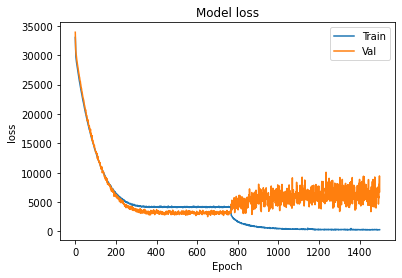

In [73]:
loss_plot(history)

In [74]:
y_test=np.array(y_test)
y_pred = model.predict(X_test, verbose = 0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [75]:
y_pred

array([[125.82701 ],
       [144.11813 ],
       [112.875206],
       [162.20343 ],
       [304.31396 ],
       [139.75177 ],
       [187.38885 ],
       [141.17767 ],
       [123.29105 ],
       [112.211876],
       [ 88.4158  ],
       [120.92451 ],
       [165.45685 ],
       [111.00291 ],
       [332.48898 ],
       [206.23563 ],
       [220.51237 ],
       [164.62885 ],
       [290.15747 ],
       [127.712616],
       [114.5265  ],
       [195.23985 ],
       [130.26001 ],
       [205.29575 ],
       [152.54703 ],
       [251.23901 ],
       [167.608   ],
       [108.93177 ],
       [125.3946  ],
       [206.52052 ],
       [221.7169  ],
       [122.59632 ],
       [268.39758 ],
       [113.42614 ],
       [318.6189  ],
       [162.20343 ],
       [304.31396 ],
       [139.75177 ],
       [187.38885 ],
       [141.17767 ],
       [123.29105 ],
       [112.211876],
       [ 88.4158  ],
       [120.92451 ],
       [165.45685 ],
       [111.00291 ],
       [332.48898 ],
       [206.2

In [76]:
#calculate test loss/mse
mean_squared_error(y_pred, y_test)

6960.868392050332

In [77]:
score = model.evaluate(X_test, y_test, verbose=False) 
print('Metric Names',model.metrics_names)
print('Test Score:', score)


Metric Names ['loss']
Test Score: 6960.86865234375


In [78]:
score = model.evaluate(X_train, y_train, verbose=False) 
print('Metric Names',model.metrics_names)
print('Training Score:', score)


Metric Names ['loss']
Training Score: 7108.95068359375


In [79]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)


In [80]:
#result_array = result_array.sort_values(by=['Date'])
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

,y_test,y_predicted,Date
0,132.85,125.827011,2015-07-21
1,144.49,144.118134,2017-06-28
2,116.44,112.875206,2015-09-25
3,191.81,162.203430,2019-06-10
4,108.91,304.313965,2016-04-08
...,...,...,...
372,112.02,114.526497,2015-12-17
373,205.53,195.239853,2019-08-02
374,148.82,130.260010,2017-07-17
375,273.61,205.295746,2020-04-22


In [81]:
result_array['Date'] =pd.to_datetime(result_array.Date)


In [82]:
result_array=result_array.sort_values(by='Date')
result_array

,y_test,y_predicted,Date
45,125.72,111.002907,2015-07-15
357,127.74,139.751770,2015-07-16
0,132.85,125.827011,2015-07-21
128,125.32,122.533386,2015-07-24
241,123.38,164.628845,2015-07-28
...,...,...,...
49,319.25,164.628845,2020-05-29
34,344.72,318.618896,2020-06-12
76,351.46,165.456848,2020-06-16
236,365.00,165.456848,2020-06-24


In [83]:
result_array=result_array.reset_index(drop=True, inplace=False)

Text(0.5, 1.0, 'Stock price over time')

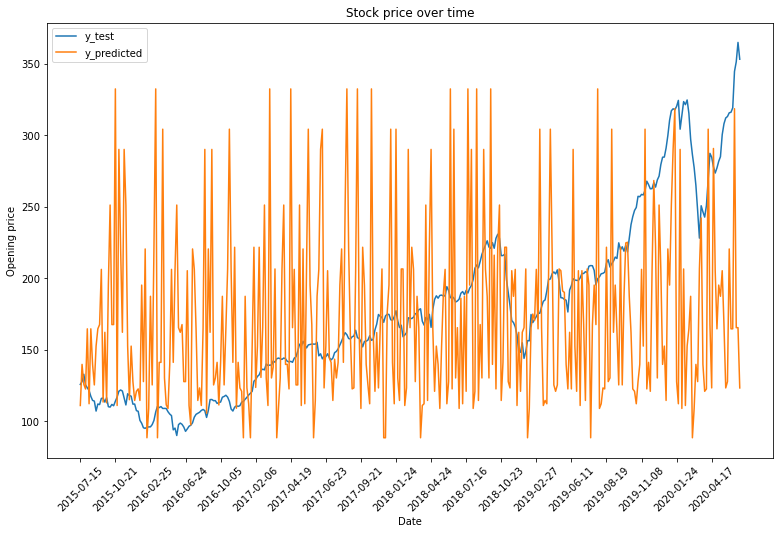

In [84]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Stock price over time')

Explanation of how you created your dataset.

• Any preprocessing steps you followed

• All design steps you went through in finding the best network in your report and how you chose your
final design.

• Architecture of your final network, number of epochs, batch size (if needed), loss function, training
algorithm, etc.

• Output of the training loop with comments on your output - Discussion under both loss plots

• Output from testing, including the final plot and your comment on it - discussion on ypred/ytrue dataframe and final plot.

• What would happen if you used more days for features (feel free to actually try it – but do not
upload the datasets).

## Model #2

In [85]:
model_1 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(75, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(30, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(30),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [86]:
model_1.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [87]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 12, 75)            17550     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 75)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 12, 30)            9630      
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 30)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [88]:
%%time
history = model_1.fit(X_train,y_train,validation_split=0.05,epochs=1500,batch_size=64,verbose=1)


Epoch 1/1500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/14 [==========================>...] - ETA: 0s - loss: 33346.9102WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x177704ca0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

14/14 [==============================] - 1s 40ms/step - loss: 23268.0219 - val_loss: 24217.4121
Epoch 59/1500
14/14 [==============================] - 1s 40ms/step - loss: 23863.9078 - val_loss: 24092.4082
Epoch 60/1500
14/14 [==============================] - 1s 40ms/step - loss: 24202.2531 - val_loss: 23738.9707
Epoch 61/1500
14/14 [==============================] - 1s 40ms/step - loss: 23448.5660 - val_loss: 23797.1387
Epoch 62/1500
14/14 [==============================] - 1s 40ms/step - loss: 22839.6598 - val_loss: 23793.7285
Epoch 63/1500
14/14 [==============================] - 1s 40ms/step - loss: 23179.1371 - val_loss: 23962.0000
Epoch 64/1500
14/14 [==============================] - 1s 40ms/step - loss: 22935.6040 - val_loss: 23362.3613
Epoch 65/1500
14/14 [==============================] - 1s 40ms/step - loss: 23307.7060 - val_loss: 23346.8672
Epoch 66/1500
14/14 [==============================] - 1s 40ms/step - loss: 23279.2788 - val_loss: 23524.9824
Epoch 67/1500
14/14 [===

14/14 [==============================] - 1s 40ms/step - loss: 15961.3700 - val_loss: 16774.5938
Epoch 133/1500
14/14 [==============================] - 1s 40ms/step - loss: 16093.2775 - val_loss: 16403.5176
Epoch 134/1500
14/14 [==============================] - 1s 40ms/step - loss: 16107.2610 - val_loss: 16178.0117
Epoch 135/1500
14/14 [==============================] - 1s 40ms/step - loss: 15748.9446 - val_loss: 16135.6406
Epoch 136/1500
14/14 [==============================] - 1s 40ms/step - loss: 16249.1134 - val_loss: 16603.6387
Epoch 137/1500
14/14 [==============================] - 1s 40ms/step - loss: 16939.0831 - val_loss: 16287.2979
Epoch 138/1500
14/14 [==============================] - 1s 40ms/step - loss: 16435.8436 - val_loss: 16047.1816
Epoch 139/1500
14/14 [==============================] - 1s 40ms/step - loss: 15299.2446 - val_loss: 16565.8730
Epoch 140/1500
14/14 [==============================] - 1s 40ms/step - loss: 16732.5975 - val_loss: 15988.5820
Epoch 141/1500
1

Epoch 206/1500
14/14 [==============================] - 1s 40ms/step - loss: 11861.3265 - val_loss: 11098.1025
Epoch 207/1500
14/14 [==============================] - 1s 40ms/step - loss: 10724.8331 - val_loss: 10730.7148
Epoch 208/1500
14/14 [==============================] - 1s 40ms/step - loss: 12308.3324 - val_loss: 11262.3027
Epoch 209/1500
14/14 [==============================] - 1s 41ms/step - loss: 11774.0729 - val_loss: 11077.8369
Epoch 210/1500
14/14 [==============================] - 1s 42ms/step - loss: 10247.6584 - val_loss: 11232.8564
Epoch 211/1500
14/14 [==============================] - 1s 41ms/step - loss: 10433.3363 - val_loss: 10987.5195
Epoch 212/1500
14/14 [==============================] - 1s 41ms/step - loss: 11528.6196 - val_loss: 10657.4961
Epoch 213/1500
14/14 [==============================] - 1s 41ms/step - loss: 11368.8402 - val_loss: 10716.5459
Epoch 214/1500
14/14 [==============================] - 1s 41ms/step - loss: 11406.8877 - val_loss: 10725.0068
E

14/14 [==============================] - 1s 43ms/step - loss: 7727.4950 - val_loss: 7522.9473
Epoch 281/1500
14/14 [==============================] - 1s 41ms/step - loss: 7505.6404 - val_loss: 7603.4189
Epoch 282/1500
14/14 [==============================] - 1s 44ms/step - loss: 7639.5935 - val_loss: 7455.7427
Epoch 283/1500
14/14 [==============================] - 1s 41ms/step - loss: 8269.9693 - val_loss: 7296.0552
Epoch 284/1500
14/14 [==============================] - 1s 42ms/step - loss: 8208.4936 - val_loss: 7939.9155
Epoch 285/1500
14/14 [==============================] - 1s 40ms/step - loss: 7235.1135 - val_loss: 7470.9658
Epoch 286/1500
14/14 [==============================] - 1s 41ms/step - loss: 7273.9855 - val_loss: 7068.0269
Epoch 287/1500
14/14 [==============================] - 1s 41ms/step - loss: 7591.2115 - val_loss: 7292.1074
Epoch 288/1500
14/14 [==============================] - 1s 44ms/step - loss: 7432.6004 - val_loss: 7300.3296
Epoch 289/1500
14/14 [============

14/14 [==============================] - 1s 41ms/step - loss: 5424.4361 - val_loss: 5633.9878
Epoch 356/1500
14/14 [==============================] - 1s 41ms/step - loss: 5800.2400 - val_loss: 4868.7715
Epoch 357/1500
14/14 [==============================] - 1s 41ms/step - loss: 5535.5945 - val_loss: 5101.5801
Epoch 358/1500
14/14 [==============================] - 1s 41ms/step - loss: 5809.7800 - val_loss: 5480.0718
Epoch 359/1500
14/14 [==============================] - 1s 41ms/step - loss: 5824.2875 - val_loss: 5021.3643
Epoch 360/1500
14/14 [==============================] - 1s 41ms/step - loss: 5453.8764 - val_loss: 5110.8052
Epoch 361/1500
14/14 [==============================] - 1s 41ms/step - loss: 5724.7358 - val_loss: 5218.5464
Epoch 362/1500
14/14 [==============================] - 1s 40ms/step - loss: 5421.2285 - val_loss: 5172.4233
Epoch 363/1500
14/14 [==============================] - 1s 41ms/step - loss: 5156.9680 - val_loss: 4961.4966
Epoch 364/1500
14/14 [============

14/14 [==============================] - 1s 42ms/step - loss: 4720.7776 - val_loss: 3910.2280
Epoch 431/1500
14/14 [==============================] - 1s 43ms/step - loss: 4502.0854 - val_loss: 3986.2515
Epoch 432/1500
14/14 [==============================] - 1s 41ms/step - loss: 4907.9301 - val_loss: 3988.7234
Epoch 433/1500
14/14 [==============================] - 1s 41ms/step - loss: 5133.7828 - val_loss: 3835.4600
Epoch 434/1500
14/14 [==============================] - 1s 40ms/step - loss: 4613.8329 - val_loss: 3907.8279
Epoch 435/1500
14/14 [==============================] - 1s 41ms/step - loss: 4977.2640 - val_loss: 4110.2388
Epoch 436/1500
14/14 [==============================] - 1s 40ms/step - loss: 4558.5021 - val_loss: 3794.2656
Epoch 437/1500
14/14 [==============================] - 1s 41ms/step - loss: 4532.6184 - val_loss: 4150.7236
Epoch 438/1500
14/14 [==============================] - 1s 40ms/step - loss: 4821.2759 - val_loss: 4542.1177
Epoch 439/1500
14/14 [============

14/14 [==============================] - 1s 40ms/step - loss: 4335.6453 - val_loss: 3247.3987
Epoch 506/1500
14/14 [==============================] - 1s 40ms/step - loss: 4308.5013 - val_loss: 3316.5791
Epoch 507/1500
14/14 [==============================] - 1s 41ms/step - loss: 4468.2362 - val_loss: 3613.5803
Epoch 508/1500
14/14 [==============================] - 1s 40ms/step - loss: 4197.0850 - val_loss: 3197.3149
Epoch 509/1500
14/14 [==============================] - 1s 40ms/step - loss: 4415.5323 - val_loss: 3147.1680
Epoch 510/1500
14/14 [==============================] - 1s 40ms/step - loss: 3963.2697 - val_loss: 3486.6365
Epoch 511/1500
14/14 [==============================] - 1s 41ms/step - loss: 4024.3085 - val_loss: 3651.7422
Epoch 512/1500
14/14 [==============================] - 1s 40ms/step - loss: 4405.2426 - val_loss: 3730.7932
Epoch 513/1500
14/14 [==============================] - 1s 40ms/step - loss: 4260.5375 - val_loss: 3318.3083
Epoch 514/1500
14/14 [============

14/14 [==============================] - 1s 40ms/step - loss: 4574.5502 - val_loss: 3009.3047
Epoch 581/1500
14/14 [==============================] - 1s 40ms/step - loss: 4120.8737 - val_loss: 3073.9517
Epoch 582/1500
14/14 [==============================] - 1s 40ms/step - loss: 4356.6799 - val_loss: 3637.3167
Epoch 583/1500
14/14 [==============================] - 1s 40ms/step - loss: 3934.1399 - val_loss: 3311.9587
Epoch 584/1500
14/14 [==============================] - 1s 40ms/step - loss: 4120.7179 - val_loss: 3137.8010
Epoch 585/1500
14/14 [==============================] - 1s 40ms/step - loss: 4765.7078 - val_loss: 3017.5603
Epoch 586/1500
14/14 [==============================] - 1s 41ms/step - loss: 4348.2016 - val_loss: 3263.3875
Epoch 587/1500
14/14 [==============================] - 1s 40ms/step - loss: 4494.7520 - val_loss: 3215.0610
Epoch 588/1500
14/14 [==============================] - 1s 40ms/step - loss: 4357.5038 - val_loss: 3420.9573
Epoch 589/1500
14/14 [============

14/14 [==============================] - 1s 40ms/step - loss: 4367.6741 - val_loss: 3259.7759
Epoch 656/1500
14/14 [==============================] - 1s 40ms/step - loss: 4614.0738 - val_loss: 3201.1599
Epoch 657/1500
14/14 [==============================] - 1s 40ms/step - loss: 4051.1693 - val_loss: 3157.7991
Epoch 658/1500
14/14 [==============================] - 1s 40ms/step - loss: 4175.7353 - val_loss: 2973.3218
Epoch 659/1500
14/14 [==============================] - 1s 40ms/step - loss: 4161.4192 - val_loss: 3451.0205
Epoch 660/1500
14/14 [==============================] - 1s 40ms/step - loss: 4053.7324 - val_loss: 2905.9612
Epoch 661/1500
14/14 [==============================] - 1s 40ms/step - loss: 4112.6539 - val_loss: 2909.0735
Epoch 662/1500
14/14 [==============================] - 1s 42ms/step - loss: 4362.3871 - val_loss: 3082.0349
Epoch 663/1500
14/14 [==============================] - 1s 41ms/step - loss: 4218.6799 - val_loss: 3215.4844
Epoch 664/1500
14/14 [============

14/14 [==============================] - 1s 41ms/step - loss: 4110.0998 - val_loss: 3549.1938
Epoch 731/1500
14/14 [==============================] - 1s 41ms/step - loss: 4382.8595 - val_loss: 2833.1785
Epoch 732/1500
14/14 [==============================] - 1s 41ms/step - loss: 4272.4188 - val_loss: 2983.5142
Epoch 733/1500
14/14 [==============================] - 1s 41ms/step - loss: 4502.6425 - val_loss: 3342.1963
Epoch 734/1500
14/14 [==============================] - 1s 40ms/step - loss: 3996.2889 - val_loss: 3675.1416
Epoch 735/1500
14/14 [==============================] - 1s 41ms/step - loss: 4279.2939 - val_loss: 3087.4189
Epoch 736/1500
14/14 [==============================] - 1s 40ms/step - loss: 3990.6353 - val_loss: 3712.4258
Epoch 737/1500
14/14 [==============================] - 1s 40ms/step - loss: 4058.6384 - val_loss: 3487.7163
Epoch 738/1500
14/14 [==============================] - 1s 41ms/step - loss: 4243.5692 - val_loss: 3535.6306
Epoch 739/1500
14/14 [============

14/14 [==============================] - 1s 41ms/step - loss: 4088.6665 - val_loss: 3378.1626
Epoch 806/1500
14/14 [==============================] - 1s 41ms/step - loss: 4221.5401 - val_loss: 3594.7385
Epoch 807/1500
14/14 [==============================] - 1s 40ms/step - loss: 4362.9937 - val_loss: 3064.3086
Epoch 808/1500
14/14 [==============================] - 1s 41ms/step - loss: 4348.2010 - val_loss: 2958.3970
Epoch 809/1500
14/14 [==============================] - 1s 40ms/step - loss: 4182.9366 - val_loss: 3510.0000
Epoch 810/1500
14/14 [==============================] - 1s 40ms/step - loss: 4365.8946 - val_loss: 3398.5798
Epoch 811/1500
14/14 [==============================] - 1s 40ms/step - loss: 4165.1660 - val_loss: 3250.2776
Epoch 812/1500
14/14 [==============================] - 1s 40ms/step - loss: 4198.4507 - val_loss: 3309.5674
Epoch 813/1500
14/14 [==============================] - 1s 40ms/step - loss: 4029.2343 - val_loss: 3368.6790
Epoch 814/1500
14/14 [============

14/14 [==============================] - 1s 41ms/step - loss: 4222.2441 - val_loss: 3295.5681
Epoch 881/1500
14/14 [==============================] - 1s 40ms/step - loss: 4194.0007 - val_loss: 2875.6101
Epoch 882/1500
14/14 [==============================] - 1s 40ms/step - loss: 4396.1604 - val_loss: 3051.5342
Epoch 883/1500
14/14 [==============================] - 1s 40ms/step - loss: 4209.2882 - val_loss: 3609.9561
Epoch 884/1500
14/14 [==============================] - 1s 40ms/step - loss: 4231.1069 - val_loss: 3432.6201
Epoch 885/1500
14/14 [==============================] - 1s 41ms/step - loss: 3924.1781 - val_loss: 3622.4204
Epoch 886/1500
14/14 [==============================] - 1s 40ms/step - loss: 4299.2878 - val_loss: 3336.5845
Epoch 887/1500
14/14 [==============================] - 1s 40ms/step - loss: 4422.0925 - val_loss: 2867.0037
Epoch 888/1500
14/14 [==============================] - 1s 41ms/step - loss: 4433.1756 - val_loss: 2996.0049
Epoch 889/1500
14/14 [============

14/14 [==============================] - 1s 40ms/step - loss: 4276.6940 - val_loss: 3409.6526
Epoch 956/1500
14/14 [==============================] - 1s 40ms/step - loss: 4370.6247 - val_loss: 2995.9143
Epoch 957/1500
14/14 [==============================] - 1s 40ms/step - loss: 4172.6734 - val_loss: 2925.8044
Epoch 958/1500
14/14 [==============================] - 1s 40ms/step - loss: 4657.5308 - val_loss: 3034.1292
Epoch 959/1500
14/14 [==============================] - 1s 40ms/step - loss: 4453.2355 - val_loss: 3351.5076
Epoch 960/1500
14/14 [==============================] - 1s 41ms/step - loss: 3796.4111 - val_loss: 3112.9048
Epoch 961/1500
14/14 [==============================] - 1s 40ms/step - loss: 4179.5441 - val_loss: 3358.0818
Epoch 962/1500
14/14 [==============================] - 1s 40ms/step - loss: 4249.3480 - val_loss: 2984.8096
Epoch 963/1500
14/14 [==============================] - 1s 41ms/step - loss: 4366.6236 - val_loss: 3454.4346
Epoch 964/1500
14/14 [============

14/14 [==============================] - 1s 41ms/step - loss: 4385.7996 - val_loss: 3372.0681
Epoch 1031/1500
14/14 [==============================] - 1s 40ms/step - loss: 4229.5105 - val_loss: 3310.4265
Epoch 1032/1500
14/14 [==============================] - 1s 40ms/step - loss: 4393.6594 - val_loss: 3406.5476
Epoch 1033/1500
14/14 [==============================] - 1s 40ms/step - loss: 4066.2482 - val_loss: 3144.3611
Epoch 1034/1500
14/14 [==============================] - 1s 41ms/step - loss: 4162.7134 - val_loss: 3171.4678
Epoch 1035/1500
14/14 [==============================] - 1s 41ms/step - loss: 4587.4186 - val_loss: 3144.0688
Epoch 1036/1500
14/14 [==============================] - 1s 40ms/step - loss: 4189.3563 - val_loss: 3243.9609
Epoch 1037/1500
14/14 [==============================] - 1s 41ms/step - loss: 4503.7710 - val_loss: 2894.6233
Epoch 1038/1500
14/14 [==============================] - 1s 40ms/step - loss: 4588.3119 - val_loss: 3164.2991
Epoch 1039/1500
14/14 [===

14/14 [==============================] - 1s 41ms/step - loss: 4258.9314 - val_loss: 2813.0156
Epoch 1105/1500
14/14 [==============================] - 1s 41ms/step - loss: 3977.5813 - val_loss: 2836.0022
Epoch 1106/1500
14/14 [==============================] - 1s 41ms/step - loss: 4308.2488 - val_loss: 3321.5740
Epoch 1107/1500
14/14 [==============================] - 1s 41ms/step - loss: 4558.5686 - val_loss: 3209.0461
Epoch 1108/1500
14/14 [==============================] - 1s 41ms/step - loss: 4030.3964 - val_loss: 3227.8867
Epoch 1109/1500
14/14 [==============================] - 1s 41ms/step - loss: 3858.2458 - val_loss: 3143.4023
Epoch 1110/1500
14/14 [==============================] - 1s 41ms/step - loss: 4248.2790 - val_loss: 3076.9170
Epoch 1111/1500
14/14 [==============================] - 1s 41ms/step - loss: 4215.7493 - val_loss: 2793.4451
Epoch 1112/1500
14/14 [==============================] - 1s 40ms/step - loss: 4123.4836 - val_loss: 2928.4460
Epoch 1113/1500
14/14 [===

14/14 [==============================] - 1s 41ms/step - loss: 4081.9462 - val_loss: 3452.7034
Epoch 1179/1500
14/14 [==============================] - 1s 41ms/step - loss: 4395.9286 - val_loss: 3207.6025
Epoch 1180/1500
14/14 [==============================] - 1s 40ms/step - loss: 4572.0173 - val_loss: 3033.4658
Epoch 1181/1500
14/14 [==============================] - 1s 40ms/step - loss: 3998.5464 - val_loss: 3071.3459
Epoch 1182/1500
14/14 [==============================] - 1s 40ms/step - loss: 4122.2439 - val_loss: 3459.7678
Epoch 1183/1500
14/14 [==============================] - 1s 41ms/step - loss: 4275.5945 - val_loss: 3215.6897
Epoch 1184/1500
14/14 [==============================] - 1s 40ms/step - loss: 3994.9598 - val_loss: 3734.6897
Epoch 1185/1500
14/14 [==============================] - 1s 40ms/step - loss: 4002.6377 - val_loss: 3436.4258
Epoch 1186/1500
14/14 [==============================] - 1s 40ms/step - loss: 4120.5431 - val_loss: 3386.0818
Epoch 1187/1500
14/14 [===

14/14 [==============================] - 1s 40ms/step - loss: 4010.0190 - val_loss: 3554.1833
Epoch 1253/1500
14/14 [==============================] - 1s 40ms/step - loss: 4257.0649 - val_loss: 3112.9492
Epoch 1254/1500
14/14 [==============================] - 1s 41ms/step - loss: 4378.1667 - val_loss: 3198.1221
Epoch 1255/1500
14/14 [==============================] - 1s 41ms/step - loss: 4150.4128 - val_loss: 2978.0237
Epoch 1256/1500
14/14 [==============================] - 1s 40ms/step - loss: 4155.5054 - val_loss: 3422.3577
Epoch 1257/1500
14/14 [==============================] - 1s 41ms/step - loss: 4405.8629 - val_loss: 3079.9666
Epoch 1258/1500
14/14 [==============================] - 1s 40ms/step - loss: 4395.3088 - val_loss: 3064.0596
Epoch 1259/1500
14/14 [==============================] - 1s 40ms/step - loss: 4233.3975 - val_loss: 3396.5164
Epoch 1260/1500
14/14 [==============================] - 1s 40ms/step - loss: 4303.6630 - val_loss: 3739.7273
Epoch 1261/1500
14/14 [===

14/14 [==============================] - 1s 43ms/step - loss: 4534.0001 - val_loss: 2996.0627
Epoch 1327/1500
14/14 [==============================] - 1s 43ms/step - loss: 4281.1865 - val_loss: 3097.7461
Epoch 1328/1500
14/14 [==============================] - 1s 41ms/step - loss: 4232.4809 - val_loss: 3123.8267
Epoch 1329/1500
14/14 [==============================] - 1s 42ms/step - loss: 4103.3255 - val_loss: 3072.2461
Epoch 1330/1500
14/14 [==============================] - 1s 41ms/step - loss: 4182.8632 - val_loss: 3412.2874
Epoch 1331/1500
14/14 [==============================] - 1s 42ms/step - loss: 4493.1692 - val_loss: 2927.1267
Epoch 1332/1500
14/14 [==============================] - 1s 43ms/step - loss: 4696.2171 - val_loss: 3242.7827
Epoch 1333/1500
14/14 [==============================] - 1s 41ms/step - loss: 4508.5852 - val_loss: 3266.6611
Epoch 1334/1500
14/14 [==============================] - 1s 41ms/step - loss: 4295.8612 - val_loss: 3145.5100
Epoch 1335/1500
14/14 [===

14/14 [==============================] - 1s 41ms/step - loss: 4539.9474 - val_loss: 3043.0427
Epoch 1401/1500
14/14 [==============================] - 1s 41ms/step - loss: 4030.6799 - val_loss: 3075.6172
Epoch 1402/1500
14/14 [==============================] - 1s 40ms/step - loss: 4695.4815 - val_loss: 3035.8149
Epoch 1403/1500
14/14 [==============================] - 1s 41ms/step - loss: 4076.0588 - val_loss: 3337.9944
Epoch 1404/1500
14/14 [==============================] - 1s 41ms/step - loss: 4366.6021 - val_loss: 3242.8867
Epoch 1405/1500
14/14 [==============================] - 1s 41ms/step - loss: 4259.1305 - val_loss: 3160.2126
Epoch 1406/1500
14/14 [==============================] - 1s 41ms/step - loss: 4426.3384 - val_loss: 3879.7385
Epoch 1407/1500
14/14 [==============================] - 1s 41ms/step - loss: 4202.0433 - val_loss: 3376.4822
Epoch 1408/1500
14/14 [==============================] - 1s 40ms/step - loss: 4301.1237 - val_loss: 3074.5398
Epoch 1409/1500
14/14 [===

14/14 [==============================] - 1s 41ms/step - loss: 4078.6194 - val_loss: 3385.3789
Epoch 1475/1500
14/14 [==============================] - 1s 41ms/step - loss: 4086.1287 - val_loss: 3426.6135
Epoch 1476/1500
14/14 [==============================] - 1s 41ms/step - loss: 4144.4199 - val_loss: 3265.6560
Epoch 1477/1500
14/14 [==============================] - 1s 41ms/step - loss: 4029.2272 - val_loss: 3383.7451
Epoch 1478/1500
14/14 [==============================] - 1s 41ms/step - loss: 4274.4014 - val_loss: 2642.5068
Epoch 1479/1500
14/14 [==============================] - 1s 41ms/step - loss: 4242.3365 - val_loss: 3603.7087
Epoch 1480/1500
14/14 [==============================] - 1s 41ms/step - loss: 4248.4185 - val_loss: 3431.6299
Epoch 1481/1500
14/14 [==============================] - 1s 41ms/step - loss: 4374.2035 - val_loss: 3094.5225
Epoch 1482/1500
14/14 [==============================] - 1s 41ms/step - loss: 4231.8369 - val_loss: 3018.1235
Epoch 1483/1500
14/14 [===

In [89]:
print(history.history["loss"][-1])

4209.40966796875


In [90]:
print('training MSE', model_1.evaluate(X_train, y_train, verbose=0))

training MSE 4178.6455078125


In [91]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


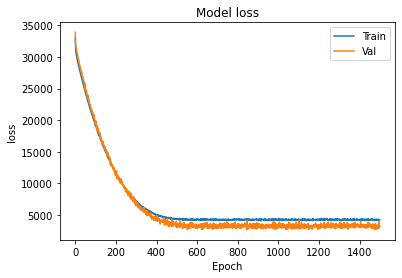

In [92]:
loss_plot(history)

In [93]:
y_test=np.array(y_test)
y_pred = model_1.predict(X_test, verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [94]:
y_pred

array([[169.7409 ],
       [169.7409 ],
       [169.7409 ],
       [190.1423 ],
       [163.16498],
       [163.15158],
       [169.4176 ],
       [176.9466 ],
       [162.52625],
       [196.88644],
       [190.30069],
       [183.37775],
       [162.99765],
       [156.15231],
       [176.34448],
       [156.69266],
       [183.2327 ],
       [169.99695],
       [170.24521],
       [176.9042 ],
       [163.04941],
       [176.58047],
       [182.92908],
       [162.86319],
       [162.63562],
       [156.3569 ],
       [203.47177],
       [155.88843],
       [189.65558],
       [162.64227],
       [156.40558],
       [169.9346 ],
       [169.7409 ],
       [169.7409 ],
       [169.7409 ],
       [190.1423 ],
       [163.16498],
       [163.15158],
       [169.4176 ],
       [176.9466 ],
       [162.52625],
       [196.88644],
       [190.30069],
       [183.37775],
       [162.99765],
       [156.15231],
       [176.34448],
       [156.69266],
       [183.2327 ],
       [169.99695],


In [95]:
#calculate test loss/mse
mean_squared_error(y_pred, y_test)

4017.668317957078

In [96]:
score = model_1.evaluate(X_test, y_test, verbose=False) 
print('Metric Names',model_1.metrics_names)
print('Test Score for Model 2:', score)


Metric Names ['loss']
Test Score for Model 2: 4017.66845703125


In [97]:
score = model_1.evaluate(X_train, y_train, verbose=False) 
print('Metric Names',model_1.metrics_names)
print('Training Score for Model 2:', score)


Metric Names ['loss']
Training Score for Model 2: 4178.6455078125


In [98]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)


In [99]:
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

,y_test,y_predicted,Date
0,132.85,169.740906,2015-07-21
1,144.49,169.740906,2017-06-28
2,116.44,169.740906,2015-09-25
3,191.81,190.142303,2019-06-10
4,108.91,163.164978,2016-04-08
...,...,...,...
372,112.02,163.049408,2015-12-17
373,205.53,176.580475,2019-08-02
374,148.82,182.929077,2017-07-17
375,273.61,162.863190,2020-04-22


In [100]:
result_array['Date'] =pd.to_datetime(result_array.Date)


In [101]:
result_array=result_array.sort_values(by='Date')
result_array

,y_test,y_predicted,Date
45,125.72,156.152313,2015-07-15
357,127.74,163.151581,2015-07-16
0,132.85,169.740906,2015-07-21
128,125.32,169.740906,2015-07-24
241,123.38,169.996948,2015-07-28
...,...,...,...
49,319.25,169.996948,2020-05-29
34,344.72,169.740906,2020-06-12
76,351.46,162.997650,2020-06-16
236,365.00,162.997650,2020-06-24


In [102]:
result_array=result_array.reset_index(drop=True, inplace=False)

Text(0.5, 1.0, 'Stock price over time')

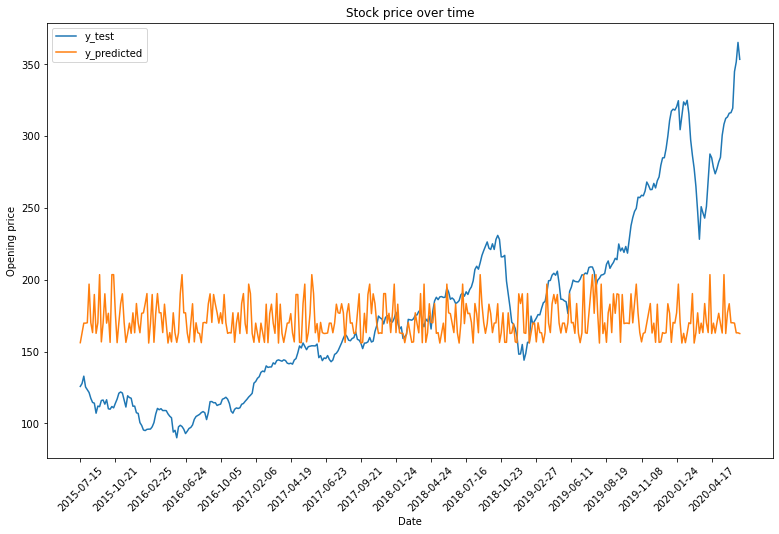

In [103]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Stock price over time')

## Effect of Adding More Features



References

1 "LSTM Optimizer Choice ?" https://deepdatascience.wordpress.com/2016/11/18/which-lstm-optimizer-to-use/